<a href="https://colab.research.google.com/github/cswcjt/Deep_Learning/blob/main/pytorch_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import torch

In [75]:
torch.__version__

'1.13.0+cu116'

### 1. tensor 만들기

In [76]:
x = [[0,1], [2,3]]

In [77]:
print('x:', x)
print('type:', type(x))

x: [[0, 1], [2, 3]]
type: <class 'list'>


In [78]:
x_tensor = torch.tensor(x)
print('x_tensor:', x_tensor)
print('type:', type(x_tensor))

x_tensor: tensor([[0, 1],
        [2, 3]])
type: <class 'torch.Tensor'>


In [79]:
import numpy as np

In [80]:
x_numpy = np.array(x)
print(type(x_numpy))

<class 'numpy.ndarray'>


In [81]:
numpy_to_tensor = torch.from_numpy(x_numpy)
print(type(numpy_to_tensor))

<class 'torch.Tensor'>


In [82]:
tensor_to_numpy = numpy_to_tensor.numpy()
print(type(tensor_to_numpy))

<class 'numpy.ndarray'>


In [83]:
rand_tensor = torch.rand(2,2)
rand_tensor.shape

torch.Size([2, 2])

In [84]:
rand_tensor

tensor([[0.3910, 0.1616],
        [0.9422, 0.0956]])

In [85]:
tensor_zero = torch.zeros(3,3)
print(tensor_zero)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [86]:
tensor_one = torch.ones(3,3)
print(tensor_one)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


### 2. tensor 연산

In [87]:
x_tensor = torch.tensor([[1,2,3], [4,5,6]])
x_tensor

tensor([[1, 2, 3],
        [4, 5, 6]])

In [88]:
# fisrt row
print(x_tensor[0])

# second row
print(x_tensor[1])

# the last row
print(x_tensor[-1])

tensor([1, 2, 3])
tensor([4, 5, 6])
tensor([4, 5, 6])


In [89]:
# first column
print(x_tensor[:,0])

# second column
print(x_tensor[:,1])

# the last column
print(x_tensor[:,-1])

tensor([1, 4])
tensor([2, 5])
tensor([3, 6])


In [90]:
# second row, last col
print(x_tensor[1,2])
print(x_tensor[1,-1])

tensor(6)
tensor(6)


In [91]:
print("x_tensor before:", x_tensor)
x_tensor[1,1] = 0
print("x_tensor after:", x_tensor)

x_tensor before: tensor([[1, 2, 3],
        [4, 5, 6]])
x_tensor after: tensor([[1, 2, 3],
        [4, 0, 6]])


In [92]:
x_tensor = torch.tensor([[1,2,3], [4,5,6]])
print("x_tensor before:", x_tensor)
x_tensor[1] = 0
print("x_tensor after:", x_tensor)

x_tensor before: tensor([[1, 2, 3],
        [4, 5, 6]])
x_tensor after: tensor([[1, 2, 3],
        [0, 0, 0]])


In [93]:
concat_dim0 = torch.cat([x_tensor, x_tensor], dim=0)
print(concat_dim0)
print()
print(concat_dim0.shape)

tensor([[1, 2, 3],
        [0, 0, 0],
        [1, 2, 3],
        [0, 0, 0]])

torch.Size([4, 3])


In [94]:
concat_dim1 = torch.cat([x_tensor, x_tensor], dim=1)
print(concat_dim1)
print()
print(concat_dim1.shape)

tensor([[1, 2, 3, 1, 2, 3],
        [0, 0, 0, 0, 0, 0]])

torch.Size([2, 6])


In [95]:
x_tensor = torch.tensor([[1,2,3], [4,5,6]])
x_tensor.shape

torch.Size([2, 3])

In [96]:
print('2,3 --> 3,2')
x_tensor2 = x_tensor.reshape(3,2)
print(x_tensor2)
print()
print(x_tensor2.shape)

2,3 --> 3,2
tensor([[1, 2],
        [3, 4],
        [5, 6]])

torch.Size([3, 2])


In [97]:
print('2,3 --> 3,2')
x_tensor2 = x_tensor.view(3,2)
print(x_tensor2)
print()
print(x_tensor2.shape)

2,3 --> 3,2
tensor([[1, 2],
        [3, 4],
        [5, 6]])

torch.Size([3, 2])


In [98]:
### 산술 연산

In [99]:
x_tensor = torch.tensor([[1,2,3], [4,5,6]])

In [100]:
x_tensor

tensor([[1, 2, 3],
        [4, 5, 6]])

In [101]:
mat_mul = x_tensor.matmul(x_tensor.T)
mat_mul

tensor([[14, 32],
        [32, 77]])

In [102]:
element_product = x_tensor*x_tensor
element_product

element_product = x_tensor.mul(x_tensor)
element_product

tensor([[ 1,  4,  9],
        [16, 25, 36]])

In [103]:
x_tensor.sum().item()

21

### data 불러오기

In [104]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [155]:
# MNIST = DATA NAME
train_data = datasets.MNIST(
    root="data", # 어디에 다운 받을지 경로를 설정
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_data = datasets.MNIST(
    root="data", # 어디에 다운 받을지 경로를 설정
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

In [163]:
train_loader = DataLoader(train_data, batch_size=128, shuffle=True) # shuffle=True --> 매번 데이터를 부를 때마다 섞어라, 즉 데이터를 모델이 외우지 못하기 위함
test_loader = DataLoader(test_data, batch_size=128, shuffle=False)

Feature batch shape: torch.Size([128, 1, 28, 28])
Labels batch shape: torch.Size([128])


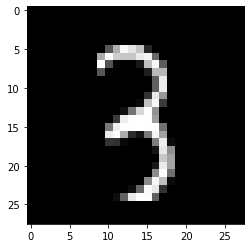

Label: 3


In [164]:
train_features, train_labels = next(iter(train_loader))

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [165]:
# labels_map = {
#     0: "T-Shirt",
#     1: "Trouser",
#     2: "Pullover",
#     3: "Dress",
#     4: "Coat",
#     5: "Sandal",
#     6: "Shirt",
#     7: "Sneaker",
#     8: "Bag",
#     9: "Ankle Boot",
# }
# figure = plt.figure(figsize=(8, 8))
# cols, rows = 3, 3
# for i in range(1, cols * rows + 1):
#     sample_idx = torch.randint(len(train_data), size=(1,)).item()
#     img, label = train_data[sample_idx]
#     figure.add_subplot(rows, cols, i)
#     plt.title(labels_map[label])
#     plt.axis("off")
#     plt.imshow(img.squeeze(), cmap="gray")
# plt.show()

In [122]:
# images, labels = iter(train_loader)

# print(images.shape)
# print(labels.shape)

In [123]:
# plt.imshow(images[0].reshape(28,28))

In [166]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import pandas as pd

In [175]:
class My_Dataset():
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        data = self.data[idx]
        label = self.labels[idx] 
        sample = {"data": data, "class":label}
        return sample

In [176]:
data = ["NY", "BT", "CA", "BT", "NY"]
labels = [1,2,3,2,1]

df = pd.DataFrame({"data":data, 'label':labels})

data = My_Dataset(df["data"], df["label"])

In [181]:
print(next(iter(data)))

{'data': 'NY', 'class': 1}


In [182]:
print("data 수:", len(data))
print("모든 데이터:", list(DataLoader(data)))

data 수: 5
모든 데이터: [{'data': ['NY'], 'class': tensor([1])}, {'data': ['BT'], 'class': tensor([2])}, {'data': ['CA'], 'class': tensor([3])}, {'data': ['BT'], 'class': tensor([2])}, {'data': ['NY'], 'class': tensor([1])}]
